## 4. 다양한 분류 알고리즘

### 예측해야될 target은 도미일지 빙어일지 확률을 알아내 보자!

In [ ]:
# knn : 최근점을 이은 알고리즘 (기준에서 거리가 짧은 기준 (ex)k5개면 가까운 5개)
# 내가 이웃한 이웃의 툴에 따라서 자기자신 클래스를 확률로 정의할수 있다.
# (복습)target 데이터는 일렬로 되어있어야한다 & 타겟샘플이 50일때 50가지고있는 1차열 데이터만 있어야한다.
# 1차원은 대괄호 1개  .. 2차원은 대괄호2개

In [1]:
import pandas as pd
import numpy as np

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [8]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [9]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [13]:
fish_target = fish['Species'].to_numpy()

In [10]:
# tarin test 순서 잘하고 , 최소 두개가 필요하다.
# 표준툴로 정규화 해준다
#

In [15]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [25]:
# unniqe 열에서체크된 순서로 나옴 // classes_ >> 아스키코드:영문숫자 를다른다 알파벳순서
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [26]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
# predict_proba 사용하기

In [27]:
# 간단하게 확률을 만들어봄
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [28]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [29]:
# 간단하게 확률을 만들어봄
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### 위에는 33% 66% 100% 확률이라고 말하기 힘들어서 좋은 방법을 찾아보자

### 로지스틱 회귀 (범주형)
#### 다양 회기랑 비슷하지만 메카미컬하게 들어간다
#### 선형회귀는 선1개 로지스틱은 직선이 아니다. : 입력값에 따른 출력값을 모사하기 위한
#### 클래스가 여러가지 있을때 ... 

In [30]:
# 로지스틱회귀 = 시그모이드 0~ 1 값 의 x값을 구하는 방법

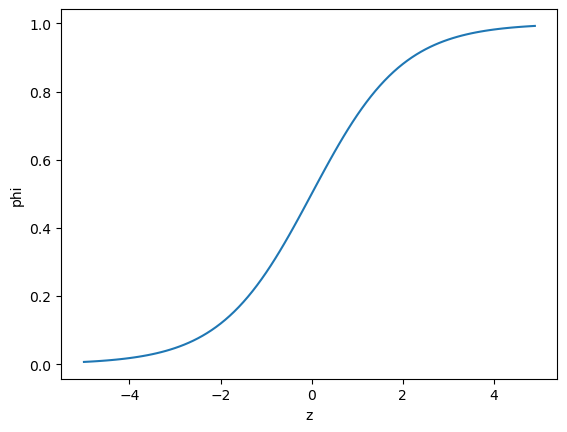

In [32]:
# z값 5해서 0.1기준으로 나누기
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()
# 전형적인 시그모이드 함수가 나오는결과값을 시각화로 볼수 있다.

In [34]:
# 쉬어가는 time numpy함수 알아보기
# 리스트를 가지고 있으면 같은 길이의 true false 순서를 비교해서 true를 가져오는 indexing

In [35]:
name = np.array(['foo', 'bar', 'baz', 'qux', 'quux'])
print(name)

['foo' 'bar' 'baz' 'qux' 'quux']


In [36]:
bol = np.array([True, False, True, True, False])
print(bol)

[ True False  True  True False]


In [37]:
name[bol]

array(['foo', 'baz', 'qux'], dtype='<U4')

In [40]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [44]:
# ******** #@! (중요) 분리형 인덱싱 (숙지하기 하드코딩 데이터파싱할때 꼭 필요하다)
# 확률은 수치형데이터지만 다를수도 있다?
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [43]:
(train_target == 'Bream') | (train_target == 'Smelt')
# 여기서 (train_target == 'Bream') 는 list나 array는 판다스의 1차원배열의 조건문을 썻을때는
#해당 샘플을 train_target 안에는 클래스가 잇는데, 하나하나비교해서 원본순서로 착착착착! 쌓아가서 arraylist로 지정이 된다.

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [42]:
(train_target == 'Smelt')

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False])

In [46]:
# 위에 훈련을 했으면 이제 프레딕트를 해준다
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [47]:
print(lr.predict_proba(train_bream_smelt[:5])) #샘플마다 컬럼의 해당하는 출력값 (음성클래스, 양성클래스)
# 예측값은 양성 z값이 작아서 첫번째는 그래프x기준 왼쪽음성클래스 오른쪽양성클래스

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [48]:
print(lr.classes_) # output value : ( 음성클래스 : 양성클래스 )

['Bream' 'Smelt']


In [49]:
# 최적의 계수들의 각특성 데이터의 그z값을 시그모이드함수에 넣어줘서 가중치, 와y절편 을 이해할수 있다.
print(lr.coef_, lr.intercept_)
# 다중선형회귀랑 비슷하다

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [50]:
# 0.5일때  양성 음성 패키지마다 다르지만 지금쓰는 싸이키런 로지스틱회귀는 음성클래스로 예측!!!

In [ ]:
# 원본 값이 나오게 하는 함수 즉,z값이 나온다. (굳이 알필요는 없다)ㄱ

In [51]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [52]:
from scipy.special import expit # 파이썬의 통계패키지

print(expit(decisions)) ## 양성클래스에 대한 확률값
# 시그모이드 함수의 출력값이 나온다

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [53]:
# decisions의 list를 넣기
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# (ppt 4챕터기준 p 19)
# predict_proba : 음/양성 확률을 출력
# decision_function :결론 추력물이아니라 z값까지 계산
# coef_, intercept_ : 계수 , 맨마지막 +되는 상수항이 나온다. ex)다항선형회귀에도 사용함
# 특정의 가중치 상수 그 z값을 시그모이드 함수를 넣으면 양성/음성클래스의 확률값이 나온다.

### 로지스틱회귀로 다중분류 수행

In [56]:
# 기본값은 100이다 # 모델값이 둔하면 과소적합
lr = LogisticRegression(C=20, max_iter=1000) # (규제값, 반복횟수(최대반복횟수))
# c값 규제 값 기준 위에 alpht값이 줄면 규제를 부수적으로 준다(살짝살짝) c값의 값은 크면 작게깍고 작으면 크게 깍는다 
# c값 과 alpht 값은 반대 <> !=
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 과적합이되면 max_iter = 1000회가 되기전에 끊는다.
# 차이가 많이 안나므로 과적합이 아니다.

0.9327731092436975
0.925


In [57]:
print(lr.predict(test_scaled[:5])) # 첫번째 열부터 다섯번째열까지의 제일 높은 확률수치를 보여준다

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [58]:
# 각클래스 의 값을 확인하자 = 확률들의 값 나온다
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [59]:
print(lr.classes_) # 해당하는 클래스의 속할 컬럼 위클래스의 값들 비교하기

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [60]:
# 각항의 대한 계수(가중치)를 알아보자
# 각특성에 곱해지는 계수 , 상수항 수치(y절편)
print(lr.coef_.shape, lr.intercept_.shape)
# <>2진분류값과 다르다. 
# z값의종류가 7개 각각의 클래스 계산하여 시그모이드 값이 나올수 있게 된다.
# 시그모이드 확률 == 소프트맥스도 확률값이 나오지만, 소프트맥스는 클래스가 e값이 다른 출력값이 각key 하나씩나온다.
# #@!(중요) 시그모이드는 z값을 넣으면 확률 하나로 나온다 != 소프트는 각각의 z값을 넣으면 확률이 나온다. 계수가 7종류
# 단, 각각의 고유한 가중치를 가지게 된다.

(7, 5) (7,)


In [ ]:
# (p21 참고) z값을 e의 제곱들로 각클래스별로 e_sum = e^z1은 bream 순서로....
# soft max (딥러닝도 나옴)

In [ ]:
# (사용할일 없음) >> 실전은 결정계수 정확도 확인.

In [63]:
# decision 값 클래스 예측값
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [68]:
# 클래스 예측값과 비교 proba 값
from scipy.special import softmax

proba = softmax(decision, axis=1)  # 세로행으로 해주는건데 소프트맥스는 세로로해야된다 axis=1 안하면 특성 샘플이 바뀐다.
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 럭키백 데이터 을 만들어라 (오후실습시간) -- 분류
### result : 

In [ ]:
# 한번한것을 개선해 나가는것 점진적학습(온라인학습)

# (p 24 확률적 경사 하강법 관련)
# 에포크 : 반복의 단위 or 반복하는 행위
# 샘플을 모아놓은 단위 = 배치
# 확률적경사하강법 (실전용) != 미니 배치 경사하강법 

#(p 25 손실함수~ 26)
# 연속성데이터가 미분이 가능하고 미분이 가능해야 손실함수를 사용할수 있다
# > 미분가능한 로지스틱함수를 만들 수 있다.

# logistic 함수는 양성/음성클래스를 확인할수 있는 함수
# logistic 결과가 0.8~0.9는 양성클래스 0.2~0.3은 양성클래스가 20~30%니깐 음성클래스로 확인 한다.
# logistic 이 높을수록 예측값은 1! 낮으면 0!
# logistic 양성클래스가 될 확률이 logistic 0.9

# logistic 0.9 일때 예측 정답이 양성클래스(1)일때 - 0.9 낮은손실 그대로
# logistic 0.9 일때 예측 정답이 양성클래스(1)로 보이고 - 0.9 낮은손실 그대로
# 예측 정답이 음성클래스(0)일때 <> 반대
# log를 사용하면 모델을 학습시키지 수월한 방법을 사용할수 있다.

In [ ]:
# (#@! p26 #@!시험 로지스틱 손실 함수 = (이진 크로스엔트로피 손실함수)) = 다 싸이키런(패키지)에 있음

In [ ]:
# 확률적 경사 하강법

In [96]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [71]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [79]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [81]:
# 트레인데이터셋 평가데이터셋 나눠줍니다
from sklearn.model_selection import train_test_split
# 기준은 트레인데이터가 되어야한다.
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [82]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [83]:
# 싸이키런에 sgd 인포트 해준다
from sklearn.linear_model import SGDClassifier

In [84]:
# loss에 패러다임 loss함수로 log를 쓴다
# 에포크 : 한사이클 (반복횟수)

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# test가 더크면 과소적합

0.773109243697479
0.775


D:\ANACONDA3_ENVS\ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [85]:
# partial_fit : 에포크를 하나씩 착착착 
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 높아지긴 했지만 더 좋은 결과를 얻을수 있을거같아서 밑으로

0.8151260504201681
0.85


In [87]:
# fit모듈을 전체샘플로 클래스정보 입력되있어서 다 모델검색됨 (한번에) 자동 클래스 인식

# SGD모듈은 한샘플 한샘플씩 하기에 전체 클래스 미리 알기어려움 클래스 사전에 어떤게 잇는지 알아야 돌아감
# 그래서 numpy를 사용함
# 클래스 따로 가져오는 가져옴

import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [88]:
# for _ < 언더바의 뜻 : range는 안쓰고 퍼문 돌리는데만 사용
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

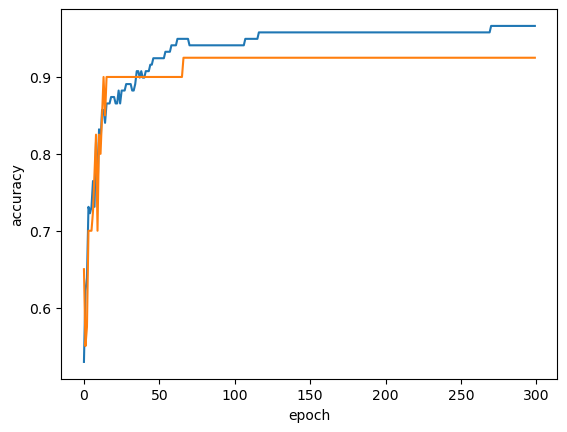

In [90]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 위에 100이라는 결과값을 받았으니 그것으로 

In [92]:
# 첫번째 loss가 적다
# loss의 차이가 tol(실수)보다 작으면 반복을 멈라라
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # none은 값은 무시하고 max_iter 값까지 돌려라
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# SGD 끝

0.957983193277311
0.925


In [ ]:
# 로그로스에 따라 내부 알고리즘이 달라진다.
# #@! 요약 > 선형일때 로지스트 비선형일때 sgd
# 

In [ ]:
#( p 36 참고 )
# 초평면 :  // 서포트벡터 : 클래스구분

In [93]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # none은 값은 무시하고 max_iter 값까지 돌려라
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 즉 SGD함수에 loss 함수에 따라 다르다.

0.9495798319327731
0.925
